The functions in ELA can be used independently of the user interface widgets to explore the energy generation and storage data and the K nearest neighbors model. Selected functions in the `ela` and `mapping` modules are described and demonstrated here.

In [1]:
import ela
import folium
%matplotlib inline

## Lookup & prediction functions: `ela.py`

### 1. get_latlon_from_zip () 
* This function needs only one input which is the zipcode.
* This function enables the user to input a zipcode and find the respective latitude and longitude for it.

In [2]:
ela.get_latlon_from_zip(98105)

(47.66377, -122.30118)

### 2. get_state_from_zip()
* This function needs only 1 input which is the zipcode.
* This function enables the user to input a zipcode and find the respective state for it.

In [3]:
ela.get_state_from_zip(98105)

'WA'

### 3. get_closest_facility()

* This function needs two inputs, a tuple of length equal to 2 and a string 'gen' or 'stor'
* This function enables the user to input a tuple of latitude and longitude and find the closest generation or storage facility for it.
* The energy generation or storage facility is returned as a pandas dataframe row object, but attributes of the facility can be selected for output.

In [4]:
ela.get_closest_facility((47.66377, -122.30118),'gen')

Unnamed: 0                                        8179
state                                               WA
name              University of Washington Power Plant
lat                                            47.6539
lon                                           -122.304
type                                               Gas
capacity_MW                                         15
production_GWh                                 12.3075
Name: 8142, dtype: object

Alternatively the `get_latlon_from__zip` function can be called and that will provide the tuple of lat-lon.

In [5]:
ela.get_closest_facility(ela.get_latlon_from_zip(98105),'stor')

Unnamed: 0                             110
name          Seattle City Light Microgrid
lat                                47.6062
lon                               -122.332
type2                     Electro-chemical
type                      Electro-chemical
power_kW                                 0
duration                               n/a
status                           Announced
usecase         Electric Energy Time Shift
city                               Seattle
state                                   WA
Name: 110, dtype: object

Printing formatted output from the returned dataframe row:

In [6]:
my_fac = ela.get_closest_facility((47.66377, -122.30118),'gen')
print("The nearest energy generation facility is {}, which is a {} \
facility with a capacity of {} MW.".
      format(my_fac['name'], my_fac['type'], my_fac.capacity_MW))

The nearest energy generation facility is University of Washington Power Plant, which is a Gas facility with a capacity of 15.0 MW.


### 4. get_state_breakdown()

* This function needs two inputs, a state in the two letter abbreviation and a pandas dataframe containing energy generation or storage facility data.
* This function enables the user to find the statewise energy generation and storage breakdown. This gives the percentage of energy facilities (*not* total energy production or storage capacity) of each type in that state.

In [7]:
ela.get_state_breakdown('WA', ela.gen_data)

,Hydro,Wind,Biomass,Gas,Oil,Coal,Other,Nuclear
WA,53%,15%,13%,11%,3%,1%,0%,0%


In [8]:
ela.get_state_breakdown('WA', ela.stor_data)

,Electro-chemical,Pumped Hydro Storage
WA,94%,5%


### 5. get_energy_breakdown()

* This function needs one input,a pandas dataframe containing energy generation or storage facility data.
* This function enables the user to find the energy generation or storage breakdown in the U.S. This gives the percentage of energy facilities (*not* total energy production or storage capacity) of each type in the U.S.

In [9]:
ela.get_energy_breakdown(ela.gen_data)

,Gas,Solar,Hydro,Wind,Oil,Biomass,Coal,Other,Geothermal,Nuclear
US,22%,18%,17%,12%,10%,9%,6%,1%,0%,0%


In [10]:
ela.get_energy_breakdown(ela.stor_data)

,Electro-chemical,Thermal Storage,Pumped Hydro Storage,Electro-mechanical
US,66%,21%,7%,5%


### 6. state_type()

* This function needs one input,a pandas dataframe containing energy generation or storage facility data.
* This function returns the same information as `get_state_breakdown()`, but as a pandas dataframe containing the energy type percentages for all U.S. states, rather than just for one state.
* This gives the percentage of energy facilities (*not* total energy production or storage capacity) of each type in that state.

In [11]:
ela.state_type(ela.gen_data).head()

,Biomass,Coal,Gas,Geothermal,Hydro,Nuclear,Oil,Other,Solar,Wind
AK,0%,3%,9%,0%,22%,0%,58%,1%,0%,2%
AL,13%,15%,32%,0%,30%,2%,3%,2%,0%,0%
AR,15%,7%,38%,0%,30%,1%,4%,0%,1%,0%
AZ,4%,4%,25%,0%,9%,0%,1%,0%,48%,4%
CA,9%,0%,23%,3%,19%,0%,1%,1%,32%,9%


### 7. get_predicted_type()

* This function needs two inputs, a tuple of length equal two for the lat-lon and a string 'gen' or 'stor'.
* This function enables the user to predict the type of generation or storage for that location, based on ELA's built-in KNN model.

In [12]:
ela.get_predicted_type((47.66377, -122.30118),'gen')

'Gas'

In [13]:
ela.get_predicted_type((47.66377, -122.30118),'stor')

'Electro-chemical'

### 8. graph_state_breakdown()

* This function needs two inputs, a state in the two letter abbreviation and a pandas dataframe 'gen' or 'stor'
* This function enables the user to visualize the statewise energy generation or storage breakdown in a pie chart.
* This gives the percentage of energy facilities (*not* total energy production or storage capacity) of each type in that state.

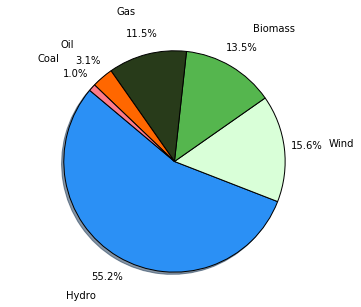

In [14]:
ela.graph_state_breakdown('WA', 'gen')

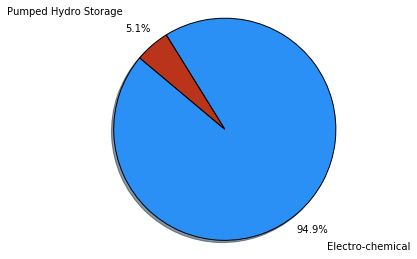

In [15]:
ela.graph_state_breakdown('WA', 'stor')

## Mapping functions: `mapping.py`

Most of the functions in `mapping` are for processing GeoJSON files and making predictions using `ela.get_predicted_type`. The mapping functions of primary interest to a general user are described below.

The GeoJSON objects needed for visualizing state- or county-level predictions are included with ELA and can be accessed as `ela.states` and `ela.counties`.

### 1. prediction_map()
* Two inputs are provided for the function, a GeoJSON object containing state or county boundaries and a string, either gen or stor.
* This function then returns a Folium map layer showing the input geographic features colored according to their predicted energy types.

In [16]:
m = folium.Map(location=[35,-97], zoom_start=4)
f = ela.prediction_map(ela.states, 'gen')
m.add_child(f)

In [17]:
m = folium.Map(location=[35,-97], zoom_start=4)
f = ela.prediction_map(ela.counties, 'stor')
m.add_child(f)

### 2. facility_map()
* Two inputs are added to this function, a string containing the two letter abbreviation of the state and the string 'gen' or 'stor'.
* This function then returns a folium map layer containing a marker for each facility.

In [18]:
m = folium.Map(location=ela.get_latlon_from_zip(98105), zoom_start=6)
f = ela.facility_map('WA', 'stor')
m.add_child(f)

In [19]:
m = folium.Map(location=ela.get_latlon_from_zip(98105), zoom_start=6)
f = ela.facility_map('WA', 'gen')
m.add_child(f)

### 3. state_map()
* This function needs a single input, a two letter abbreviation of a state.
* This function generates a blank folium map centered at the input state.

In [20]:
ela.state_map('NY')

### Combined mapping functions

These functions can be combined to display any combination of generation or storage and prediction or facilities.

In [21]:
m = ela.state_map('WA')
prediction = ela.prediction_map(ela.counties, 'gen')
facilities = ela.facility_map('WA', 'gen')
m.add_child(prediction)
m.add_child(facilities)